# Project 5

## Imports

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from requests import get

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

## Data Import + Cleaning

### 1900 Census Data

In [338]:
census = pd.read_csv(
    "https://raw.githubusercontent.com/stacker-media/data/main/1900-census-immigrant-state/1900-census-immigrant-pop-state.csv",
    header=6,
).drop([0, 1])
census.head()

,States and territories,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,Bohemia,Canada (English) (includes Newfoundland),...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other Countries,Born at Sea
2,Alabama,14592,77,52,1,16,341,45,31,617,...,1223,51,59,488,200,66,306,79,7,26
3,Alaska,12661,3,15,15,60,228,26,8,1501,...,295,20,10,1445,80,12,41,9,19,14
4,Arizona,24233,14,15,4,58,298,33,16,1116,...,399,24,51,342,199,29,136,13,1,26
5,Arkansas,14289,14,34,1,16,451,14,281,932,...,342,15,7,355,679,1,113,13,11,34
6,California,367240,168,235,3515,2269,5356,785,504,27408,...,9467,1137,896,14549,10974,619,1949,372,260,358


In [339]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 2 to 53
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   States and territories                       52 non-null     object
 1   Total foreign born                           52 non-null     int64 
 2   Africa                                       52 non-null     int64 
 3   Asia (except China, Japan, and India)        52 non-null     int64 
 4   Atlantic Islands                             52 non-null     int64 
 5   Australia                                    52 non-null     int64 
 6   Austria                                      52 non-null     int64 
 7   Belgium                                      52 non-null     int64 
 8   Bohemia                                      52 non-null     int64 
 9   Canada (English) (includes Newfoundland)     52 non-null     int64 
 10  Canada (French) 

In [340]:
census.isna().sum().sum()

0

In [341]:
census.columns

Index(['States and territories', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia',
       'Canada (English) (includes Newfoundland)',
       'Canada (French) (includes Newfoundland)', 'Central America', 'China',
       'Cuba', 'Denmark', 'England', 'Europe (not otherwise specified)',
       'Finland', 'France', 'Germany', 'Greece', 'Holland', 'Hungary', 'India',
       'Ireland', 'Italy', 'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other Countries',
       'Born at Sea'],
      dtype='object')

In [342]:
census['States and territories'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Colombia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Indian Territory', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Target Variable - Most common second language ex. Spanish

In [343]:
lang_dict = {
    "Alabama": ["Chinese"],
    "Alaska": ["Eskimo-Aleutian"],
    "Arizona": ["Navajo"],
    "Arkansas": ["Ilocano"],
    "California": ["Chinese"],
    "Colorado": ["Chinese"],
    "Connecticut": ["Portuguese"],
    "Delaware": ["Chinese"],
    "District of Colombia": ["French"],
    "Florida": ["Haitian"],
    "Georgia": ["Vietnamese"],
    "Hawaii": ["Ilocano"],
    "Idaho": ["Chinese"],
    "Illinois": ["Polish"],
    "Indiana": ["Pennsylvania Dutch"],
    "Indian Territory": ["Other Native Languages"],
    "Iowa": ["German"],
    "Kansas": ["Chinese"],
    "Kentucky": ["German"],
    "Louisiana": ["French"],
    "Maine": ["French"],
    "Maryland": ["Chinese"],
    "Massachusetts": ["Portuguese"],
    "Michigan": ["Arabic"],
    "Minnesota": ["Amharic"],
    "Mississippi": ["Vietnamese"],
    "Missouri": ["Chinese"],
    "Montana": ["Other Native Languages"],
    "Nebraska": ["Vietnamese"],
    "Nevada": ["Tagalog"],
    "New Hampshire": ["French"],
    "New Jersey": ["Chinese"],
    "New Mexico": ["Navajo"],
    "New York": ["Chinese"],
    "North Carolina": ["Chinese"],
    "North Dakota": ["German"],
    "Ohio": ["Pennsylvania Dutch"],
    "Oklahoma": ["Vietnamese"],
    "Oregon": ["Chinese"],
    "Pennsylvania": ["Chinese"],
    "Rhode Island": ["Portuguese"],
    "South Carolina": ["German"],
    "South Dakota": ["Dakota"],
    "Tennessee": ["Arabic"],
    "Texas": ["Vietnamese"],
    "Utah": ["Chinese"],
    "Vermont": ["French"],
    "Virginia": ["Chinese"],
    "Washington": ["Chinese"],
    "West Virginia": ["Chinese"],
    "Wisconsin": ["Hmong"],
    "Wyoming": ["Other Native Languages"],
}


In [344]:
languages = (
    pd.DataFrame(lang_dict)
    .T.reset_index()
    .rename(columns={"index": "States and territories", 0: "language"})
)
languages.head()


,States and territories,language
0,Alabama,Chinese
1,Alaska,Eskimo-Aleutian
2,Arizona,Navajo
3,Arkansas,Ilocano
4,California,Chinese


### Target Cleaning

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [345]:
languages['language'].value_counts()

Chinese                   17
French                     5
Vietnamese                 5
German                     4
Portuguese                 3
Other Native Languages     3
Navajo                     2
Ilocano                    2
Pennsylvania Dutch         2
Arabic                     2
Amharic                    1
Dakota                     1
Tagalog                    1
Polish                     1
Eskimo-Aleutian            1
Haitian                    1
Hmong                      1
Name: language, dtype: int64

In [346]:
others = [
    "Amharic",
    "Dakota",
    "Tagalog",
    "Polish",
    "Eskimo-Aleutian",
    "Haitian",
    "Hmong",
]


In [347]:
languages['language'].replace(to_replace=others, value='Other', inplace=True)

### Merge Data

In [348]:
merged = census.merge(languages)
merged.head()

,States and territories,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,Bohemia,Canada (English) (includes Newfoundland),...,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other Countries,Born at Sea,language
0,Alabama,14592,77,52,1,16,341,45,31,617,...,51,59,488,200,66,306,79,7,26,Chinese
1,Alaska,12661,3,15,15,60,228,26,8,1501,...,20,10,1445,80,12,41,9,19,14,Other
2,Arizona,24233,14,15,4,58,298,33,16,1116,...,24,51,342,199,29,136,13,1,26,Navajo
3,Arkansas,14289,14,34,1,16,451,14,281,932,...,15,7,355,679,1,113,13,11,34,Ilocano
4,California,367240,168,235,3515,2269,5356,785,504,27408,...,1137,896,14549,10974,619,1949,372,260,358,Chinese


### Change to percentage foreign born from each country/region

In [349]:
# https://stackoverflow.com/questions/34540567/divide-multiple-columns-by-another-column-in-pandas
X = merged.drop(columns=['States and territories', 'Total foreign born', 'language']).div(merged['Total foreign born'], axis=0)
X.head()

,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,Bohemia,Canada (English) (includes Newfoundland),Canada (French) (includes Newfoundland),Central America,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other Countries,Born at Sea
0,0.005277,0.003564,0.000069,0.001096,0.023369,0.003084,0.002124,0.042283,0.005482,0.001576,...,0.083813,0.003495,0.004043,0.033443,0.013706,0.004523,0.020970,0.005414,0.000480,0.001782
1,0.000237,0.001185,0.001185,0.004739,0.018008,0.002054,0.000632,0.118553,0.009320,0.000632,...,0.023300,0.001580,0.000790,0.114130,0.006319,0.000948,0.003238,0.000711,0.001501,0.001106
2,0.000578,0.000619,0.000165,0.002393,0.012297,0.001362,0.000660,0.046053,0.006314,0.001032,...,0.016465,0.000990,0.002105,0.014113,0.008212,0.001197,0.005612,0.000536,0.000041,0.001073
3,0.000980,0.002379,0.000070,0.001120,0.031563,0.000980,0.019665,0.065225,0.007068,0.000980,...,0.023934,0.001050,0.000490,0.024844,0.047519,0.000070,0.007908,0.000910,0.000770,0.002379
4,0.000457,0.000640,0.009571,0.006179,0.014584,0.002138,0.001372,0.074632,0.006562,0.001310,...,0.025779,0.003096,0.002440,0.039617,0.029882,0.001686,0.005307,0.001013,0.000708,0.000975


In [350]:
y = merged['language']
y.head()

0    Chinese
1      Other
2     Navajo
3    Ilocano
4    Chinese
Name: language, dtype: object

## EDA

### Most common origin by State

In [351]:
merged['Most Common Origin'] = merged.drop(columns=['States and territories', 'Total foreign born', 'language']).idxmax(axis=1)
most_common_origin = merged[['States and territories', 'Most Common Origin']]
most_common_origin['States and territories'] = most_common_origin['States and territories'].str.lower()
most_common_origin.head()

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_12057/692561947.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,States and territories,Most Common Origin
0,alabama,Germany
1,alaska,China
2,arizona,Mexico
3,arkansas,Germany
4,california,Germany


In [352]:
fips = pd.read_csv('https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv', dtype={'fips': str})
fips = fips[fips['state'].isna()]
fips['fips'] = '0' + fips['fips']
fips['name'] = fips['name'].str.lower()
fips.head()

,fips,name,state
0,00,united states,NaN
1,01000,alabama,NaN
69,02000,alaska,NaN
99,04000,arizona,NaN
115,05000,arkansas,NaN


In [353]:
most_common_fips = most_common_origin.merge(
    fips, left_on="States and territories", right_on="name"
).drop(columns=["name", "state"])


### Plotly Map

In [354]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [365]:
# With help from project 4

fig = px.choropleth(
    most_common_fips,
    locations=states,
    locationmode='USA-states',
    color='Most Common Origin',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    fitbounds="locations",
    title='Most Common Origin of Foreign Born Persons by State, 1900 Census',
)
fig.show()
fig.write_image("./images/most-common-origins.png")

## Models

### Baseline

In [356]:
y.value_counts(normalize=True)

Chinese                   0.326923
Other                     0.134615
French                    0.096154
Vietnamese                0.096154
German                    0.076923
Portuguese                0.057692
Other Native Languages    0.057692
Navajo                    0.038462
Ilocano                   0.038462
Pennsylvania Dutch        0.038462
Arabic                    0.038462
Name: language, dtype: float64

### Test-Train Split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

### Model fitting and scoring function

In [358]:
def model_fit_score(classifier, X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model = classifier
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'Training Accuracy: {round(train_score*100, 2)}%')
    print(f'Testing Accuracy: {round(test_score*100, 2)}%')
    
    matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens')
    plt.xticks(rotation=90)

    return matrix

### Logistic Regression

Training Accuracy: 33.33%
Testing Accuracy: 30.77%


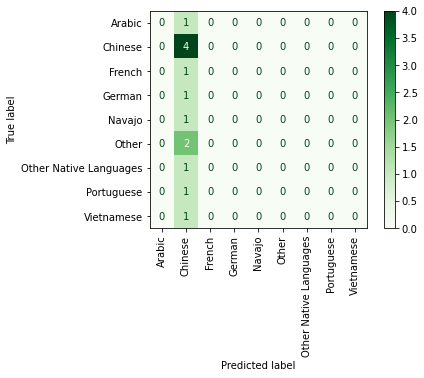

In [359]:
model_fit_score(LogisticRegression());

### Decision Tree

Training Accuracy: 100.0%
Testing Accuracy: 7.69%


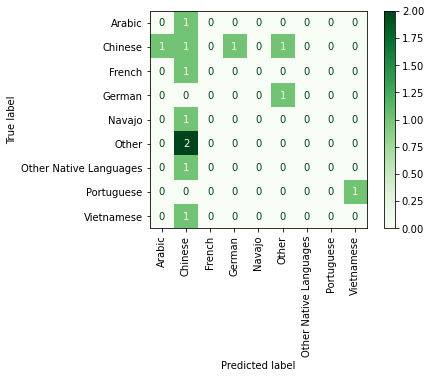

In [360]:
model_fit_score(DecisionTreeClassifier());

### Random Forest

Training Accuracy: 100.0%
Testing Accuracy: 46.15%


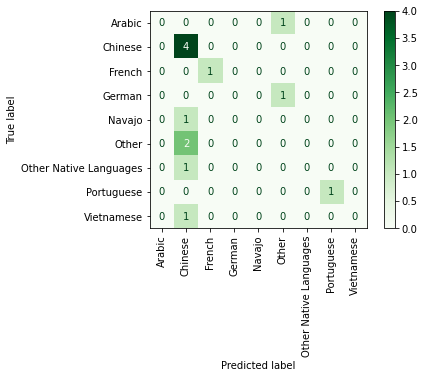

In [361]:
model_fit_score(RandomForestClassifier());

In [362]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pd.DataFrame(model.feature_importances_, X.columns).sort_values(by=0, ascending=False).head(10)

,0
Ireland,0.046241
Scotland,0.043992
Luxemburg,0.034949
Bohemia,0.034094
Switzerland,0.031934
Norway,0.031764
Poland (German),0.029807
Canada (French) (includes Newfoundland),0.027853
Australia,0.026198
Germany,0.025602
